В отделе продаж работает $k$ менеджеров продаж. Каждый из них за период может обслужить (в среднем) определенное число клиентов, т.е. производительность $i$-го продажника за период - $\lambda_i$. Вероятность того, что $i$-й продажник заключит сделку с клиентом равна $p_i$. Найти вероятность того, что отдел продаж за смену выполнит план — заключит не менее $N$ сделок. Найти мат. ожидание и дисперсию числа $X$ — заключенных сделок и числа $Y$ незаключенных сделок за смену.

# Ответ yndexGPT
Вероятность того, что за период будет заключено не менее N сделок, можно найти через вероятность противоположного события - отдел продаж заключит менее N сделок. Используя формулу вероятности суммы независимых событий, мы можем выразить эту вероятность как произведение вероятностей каждого менеджера заключить хотя бы одну сделку:

$P(X >= N) = 1 - P(X < N) = 1 - (1 - P(A_1))(1 - P(A_2))… (1 - P(A_k))$

где $P(A_i)$ - вероятность $i$-го менеджера заключить сделку.

Так как вероятность заключения сделки $i$-м менеджером равна $p_i$, то получим:

$P(X >= N) = 1 - (1 - p_1)(1 - p_2)… (1 - p_k)$

Математическое ожидание числа заключенных сделок равно сумме произведений вероятностей заключения сделки каждым менеджером на их среднюю производительность:

$E(X) = Σ(λ_i * p_i)$

Дисперсия числа заключенных сделок равна математическому ожиданию квадрата числа заключенных сделок минус квадрат математического ожидания числа заключенных сделок, то есть:
$D(X) = E(X^2) - (E(X))^2$

Для числа незаключенных сделок имеем:

$E(Y) = k - E(X)$

$D(Y) = D(X)$


### Решение 
Здесь надо обратить внимание на то, что производственная деятельность отдела, производительность которого $\sum_{i=0}^{k}\lambda_i$ сделки, разбивается на две категории: <br> первая - производство успешных сделок, производительность которых  равна $\sum_{i=0}^{k}\lambda_i\cdot p_i$ <br> и 
вторая - производство неудачных сделок, производительность которых $\sum_{i=0}^{k}\lambda_i\cdot(1- p_i)$.

Итак, пусть интенсивность заключения сделок $i$-м продавцом за период равна $\lambda_i\cdot p_i$. Тогда производительность (интенсивность) $S$ заключения сделок отделом, состоящим из $k$ продавцов, за период равна

$$\lambda_{sales} = \sum_{i=1}^{k} \lambda_i \cdot p_i$$

В соответствии с предельными теоремами теории потоков можно с достаточной для практики точностью считать, что число $S$ заключенных отделом продаж сделок за период, будет распределено по закону Пуассона с параметром $\lambda_{sales}$. Отсюда найдем вероятность выполнения отделом плана $N$ за период:

$$P(S \geq N) = 1- P(S < N) = 1- \sum_{i=0}^{N-1} \frac{\lambda_{sales}^i\exp^{-\lambda_{sales}}}{i!}$$

$M[S] = D[S] = \lambda_{sales}$.
Дисперсия $\sigma(S) = \sqrt{D(S)} = \sqrt{\lambda_{sales}}$

По той же причине случайная величина $F$ распределена по закону Пуассона с параметром $\lambda_{NOsales}$ - интенсивность незаключения сделок в смену

$$\lambda_{NOsales} = \sum_{i=1}^{k} \lambda_i (1 - p_i) = \sum_{i=1}^{k} \lambda_i - \lambda_{sales}$$

$$P(F \geq K) = 1- P(F < K) = 1- \sum_{n=0}^{K-1} \frac{\lambda_{NOsales}^n\exp^{-\lambda_{NOsales}}}{n!}$$

$M[F] = D[F] = \lambda_{NOsales}$.
Дисперсия $\sigma(F) = \sqrt{D(F)} =  \sqrt{\lambda_{NOsales}}$

### Пример

Пусть в отделе 5 продажников с производительностью (интенсивностью) $\lambda_i$ клиентов за период и вероятностью заключения сделки $p_i$

|           |1|2|3|4|5|
|-----------|-|-|--|-|-|
|$\lambda_i$|4|4|6|5|4|
|$p_i$|0.9|0.8|0.7|0.8|0.75|

План продаж в смену $N = 14$<br>
Введем следующие случайные величины:<br>
$S$ - число успешных сделок за период <br>
$F$ - число неудачных сделок за период <br>

In [9]:
import numpy as np

lambda_sales = np.array([4,4,6,5,4]) #производительность (интенсивность) продажников ( = число клиентов|период)
p = np.array([0.9,0.8,0.7,0.8,0.75]) #вероятность одной продажи для каждого продавца 

In [10]:
total_lmbd = sum(lambda_sales) #число потенциальных сделок за период
total_lmbd

23

In [11]:
lmbd_sales_dpt = sum(lambda_sales*p) #интенсивность заключения сделок отделом за период
lmbd_sales_dpt

18.0

In [12]:
# число посетителей, которые НЕ станут клиентами
lmbd_Nosales_dpt = total_lmbd - lmbd_sales_dpt #интенсивность НЕзаключения сделок за период
lmbd_Nosales_dpt

5.0

Здесь надо учитывать, что обычно отдел готовит 23 сделки, среди которых 18 успешных и 5 неудачных.

In [13]:
import math

def cumul_puasson(n,lambda_): #вероятность появления от 0 до n успехов
    return np.array([(lambda_**i)*np.exp(-lambda_)/math.factorial(i) for i in range(n + 1)]).sum()  

In [14]:
# вероятность заключения от 0 до 13 (включительно) сделок за период
P_S_0_13 = cumul_puasson(13,18) # P(X \geq N) 
P_S_0_13 

0.14259775841259617

вероятность выполнения отделом плана (=18 сделок) за период:
$P(S \geq N)$

In [15]:
plan = 14

In [16]:
# вероятность заключения не менее 14 сделок за период
P_S_ge_plan = 1 - cumul_puasson(plan - 1,18) # P(X \geq N) 
P_S_ge_plan 

0.8574022415874039

In [18]:
# дисперсия отдела
std_sales = math.sqrt(lmbd_sales_dpt)
std_sales

4.242640687119285

Обратим внимание на то, что хотя за период в среднем заключается 18 сделок, что намного больше плана (14 сделок), тем не менее вероятность того, что план будет выполнен, равна только 0,8574. Это объясняется тем, что имеется большой разброс числа успешных сделок ($\sigma(S)  = 4.243$).

Заметим, что если случайные величины $S$ и $F$ распределены по закону Пуассона, то общее число сделок $Z = S + F$, заключенных за период, будет тоже распределено по закону Пуассона; при этом случайные величины $S$ и $F$ будут независимы.

$P(F \le N)$

In [19]:
# вероятность НЕзаключения от 0 до 4 сделок (включительно) за период
P_F_0_4 = cumul_puasson(5,4) 
P_F_0_4 

0.785130387030405

In [20]:
# вероятность НЕзаключения от 5 сделок за период
P_F_ge_5 = 1 - cumul_puasson(5,4) 
P_F_ge_5 

0.21486961296959495

In [21]:
# вероятность заключения от 0 до 7 сделок за период
cumul_puasson(7,18)

0.0028934650909455584

In [25]:
# вероятности заключения больше i сделок: P_S_ge_i = 1 - puasson(i,18)
dct = dict([(i,1 - cumul_puasson(i-1,18)) for i in range (30)])
dct

{0: 1.0,
 1: 0.9999999847700203,
 2: 0.9999997106303848,
 3: 0.9999972433736662,
 4: 0.9999824398333543,
 5: 0.999915823901951,
 6: 0.9996760065488989,
 7: 0.9989565544897424,
 8: 0.9971065349090544,
 9: 0.9929439908525065,
 10: 0.9846189027394107,
 11: 0.9696337441358382,
 12: 0.9451125755118106,
 13: 0.908330822575769,
 14: 0.8574022415874039,
 15: 0.7919226374595058,
 16: 0.713347112506028,
 17: 0.6249496469333655,
 18: 0.5313523304446641,
 19: 0.4377550139559627,
 20: 0.34908387201929825,
 21: 0.26927984427630025,
 22: 0.20087639192515905,
 23: 0.144909930910589,
 24: 0.10111009185570796,
 25: 0.06826021256454728,
 26: 0.04460829947491163,
 27: 0.028233898105163857,
 28: 0.017317630525331973,
 29: 0.01030002993829715}

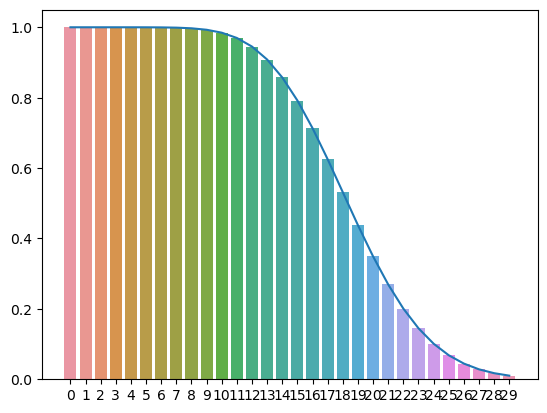

In [26]:
import seaborn as sns

#sns.title('Вероятности заключения отделом больше i сделок:\ $P(X \geq x)$ при $\lambda_{sales}=18$')
sns.barplot(x=list(dct.keys()), y=list(dct.values()));
sns.lineplot(x=list(dct.keys()), y=list(dct.values()));

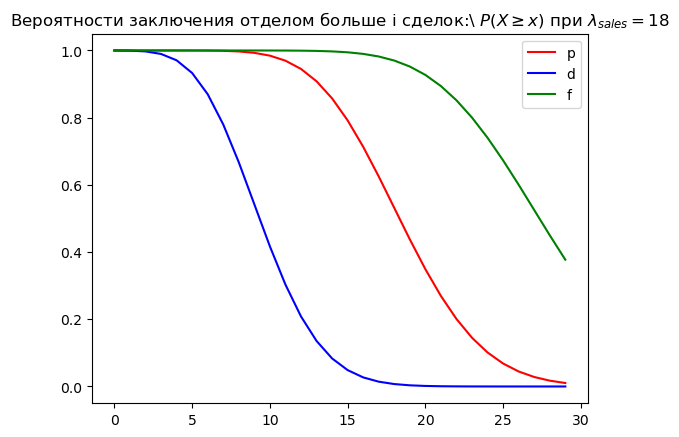

In [27]:
from matplotlib import pyplot as plt

dct1 = dict([(i,1 - cumul_puasson(i,10)) for i in range (30)])
dct2 = dict([(i,1 - cumul_puasson(i,28)) for i in range (30)])

x=list(dct.keys())
y=list(dct.values())
y1=list(dct1.values())
y2=list(dct2.values())
plt.title('Вероятности заключения отделом больше i сделок:\ $P(X \geq x)$ при $\lambda_{sales}=18$')

plt.plot(x, y,'r', y1,'b', y2, 'g' )
plt.legend('pdf '), 
plt.show()

### Итоговое решение

In [74]:
import numpy as np
import math

def puasson(m,a): #вероятность появления от 0 до m успехов при интенсивности a
    return sum(np.array([(a**k)*np.exp(-a)/math.factorial(k) for k in range(m + 1)])  )

def prob_achiv_plan (lmbd,probabilities, plan):
#     lmbd = np.array(lmbd) #производительность продажников
#     probabilities = np.array(probabilities) #вероятность заключения сделки
#     total_lmbd = sum(np.array(lmbd)) #число потенциальных сделок в смену
#     lmbd_sales = sum(np.array(lmbd)*np.array(probabilities)) #интенсивность заключения сделок в смену
    

    # вероятность заключения не менее plan сделок за смену
    return 1 - puasson(plan - 1,sum(np.array(lmbd)*np.array(probabilities))) 

In [77]:
def cumul_puasson(m,a): 
    #вероятность появления от 0 до m успехов при интенсивности a
    return sum(np.array([(a**k)*np.exp(-a)/math.factorial(k) for k in range(m + 1)])  )

def prob_achiv_plan (lmbd,probabilities, plan):
    # вероятность заключения не менее plan сделок за смену
    return 1 - cumul_puasson(plan - 1,np.array(lambda_i).dot(np.array(probabilities)).sum()) 

In [78]:
#дано:
lambda_i = [4,4,6,5,4] #производительность продажников
probabilities = [0.9,0.8,0.7,0.8,0.75] #вероятность заключения сделки
plan = 14


In [79]:
# вероятность заключения не менее plan сделок за смену
prob_achiv_plan (lambda_i,probabilities, plan)

0.8574022415874039

### Пытаюсь понять каким параметром поиграть

In [25]:
import random
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import *
import ipywidgets as wg
from IPython.display import display

def interactive_graph(n = 0): 
    
    #dct = dict([(i,1 - puasson(i,n)) for i in range (30)])
    dct = dict([(i,1 - puasson(n,i)) for i in range (30)])
    # x = np.linspace(0, 40, 42)
    x=list(dct.keys())
    y=list(dct.values())
    plt.title("""Вероятности выполнения отделом плана: 
               $P(X \geq x)$ при $\lambda_(sales)={}$""".format(n))

    plt.plot(x, y, 'r')
    plt.legend('p'), 
    plt.show()
    
w = interactive(interactive_graph, n = (0,30)) #интерактивно меняем объем плана
display(w)

interactive(children=(IntSlider(value=0, description='n', max=30), Output()), _dom_classes=('widget-interact',…